In [42]:
# Data Preprocessing Template

using DataFrames
using CSV
using Random
using MLDataUtils
using GLM

Random.seed!(1)

# Importing the dataset
df = CSV.File("Mall_Customers.csv") |> DataFrames.DataFrame!;
X = Matrix(df[!, [ 4, 5 ]]);

In [43]:
using Clustering

function wcss(X, result::KmeansResult)
    assignments = result.assignments
    centers     = result.centers
    
    metrics = 0.0
    for (index, row) in enumerate(eachrow(X))
        center = centers[:, assignments[index]]
        distance = (row[1] - center[1])^2 + (row[2] - center[2])^2
        metrics += distance
    end
    
    return metrics
end

wcss (generic function with 1 method)

In [44]:
# Using the elbow method to find the optimal number of clusters
wcss_v = []
for i in 1:11
    result = kmeans(transpose(X), i; maxiter = 300, init = :kmpp)
    push!(wcss_v, wcss(X, result))
end

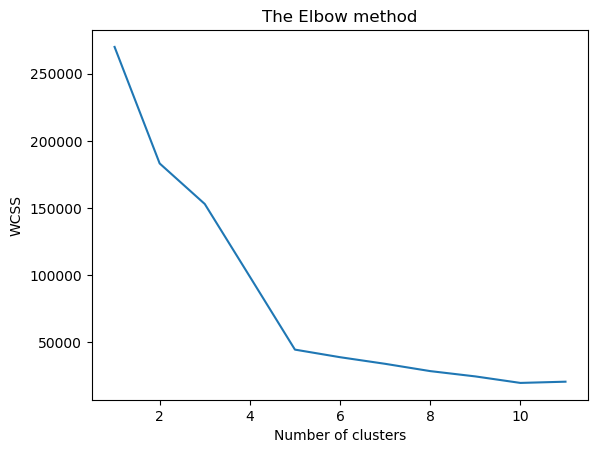

In [45]:
using PyPlot

plt.plot(1:11, wcss_v)
plt.title("The Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [56]:
# Applying k-means to the mall dataset
result = kmeans(transpose(X), 5, init = :kmpp, maxiter = 300);

y_kmeans = assignments(result);

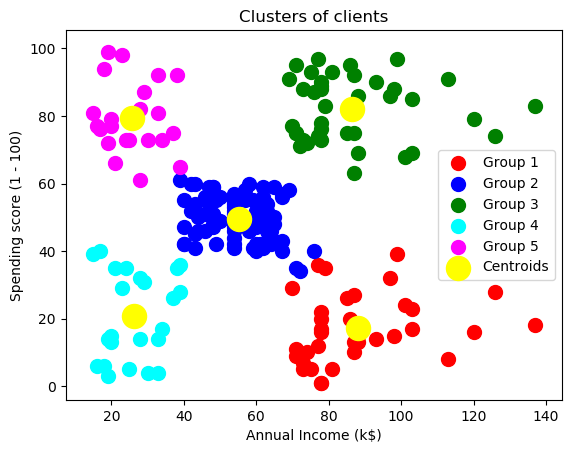

In [58]:
# Visualising the clusters
plt.scatter(X[ y_kmeans .== 1, 1 ], X[ y_kmeans .== 1, 2 ], s = 100, c = :red, label = "Group 1")
plt.scatter(X[ y_kmeans .== 2, 1 ], X[ y_kmeans .== 2, 2 ], s = 100, c = :blue, label = "Group 2")
plt.scatter(X[ y_kmeans .== 3, 1 ], X[ y_kmeans .== 3, 2 ], s = 100, c = :green, label = "Group 3")
plt.scatter(X[ y_kmeans .== 4, 1 ], X[ y_kmeans .== 4, 2 ], s = 100, c = :cyan, label = "Group 4")
plt.scatter(X[ y_kmeans .== 5, 1 ], X[ y_kmeans .== 5, 2 ], s = 100, c = :magenta, label = "Group 5")

plt.scatter(result.centers[1, :], result.centers[2, :], s = 300, c = :yellow, label = "Centroids")

plt.title("Clusters of clients")
plt.xlabel("Annual Income (k\$)")
plt.ylabel("Spending score (1 - 100)")
plt.legend()
plt.show()